
# Project: Investigate a Dataset : No-Show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda1">Exploratory Data Analysis : Q1</a></li>
<li><a href="#eda2">Exploratory Data Analysis : Q2</a></li>
<li><a href="#eda3">Exploratory Data Analysis : Q3</a></li>
<li><a href="#conclusions">Conclusions</a></li>
    <li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset selected is the no-show appointments dataset.

> Questions to be answered:
- Is there an age group that no-shows more than others?
- Is there a certain hospital with more no-shows than others?
- Is there any correlation between lead-time of appointment vs. no-show status?

#### Resources
> Code used here is based on Udacity lessons, my own code used during the quizzes in this class, and links from the resources mentioned in the course syllabus. Additional external sources cited below:

> - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
> - https://pandas.pydata.org/pandas-docs/stable/dsintro.html
> - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
> - https://wiki.python.org/moin/UnicodeDecodeError
> - https://stackoverflow.com/questions/3942888/unicodeencodeerror-latin-1-codec-cant-encode-character
> - https://www.youtube.com/watch?v=WbTOutpwPHs&t=140s
> - https://www.youtube.com/watch?v=q7Bo_J8x_dw

In [1]:
# Use this cell to set up import statements for all of the packages that are to be used

#import statements for packages to be used
import pandas as pd
import numpy as np
import csv # read and write csv files
from datetime import datetime # operations to parse dates
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

**Initial Observations**
- Rows: 110527 
- Columns: 14
- Most columns have numeric values instead of 'Yes/No' indicators

**Steps Taken to Clean Data:**
- Check to see if there are any duplicate entries. If so, take steps to remove duplicates.
- Check to see if any null values exist in the data.
- Investigate ways to clean up formatting of datetime column(s) for better visualizations
- Investigate ways to change numeric indicators to 'Yes/No' values for easier understanding

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappts.csv', encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
#converting PatientId from float to integar
df['PatientId'] = (df['PatientId']).astype('int64')

#### Checking to see if there are any duplicates in the data.

In [4]:
# Confirming if any duplicate entries exist
sum(df.duplicated())

0

#### Confirm if any null values exist in the data.

In [5]:
# check columns with null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### Count Number of Hospital Visits by Patient ID

In [6]:
#checking how many times folks are coming to the hospital for appointments
df['PatientId'].value_counts()

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
6264198675331      62
75797461494159     62
258424392677       62
871374938638855    62
66844879846766     57
872278549442       55
89239687393655     54
8435223536         51
853439686798559    50
14479974122994     46
65433599726992     46
81894521843749     42
9452745294842      42
188232341789524    40
2271579924275      38
9496196639835      38
13364929297498     37
1484143378533      35
986162815579582    34
88834999836575     34
712458866975343    33
6128878448536      30
416755661551767    30
81213966782532     29
8634164126317      24
36994987339512     23
                   ..
98683352133221      1
5394313945329       1
48689197872217      1
9675119787546       1
763619586595        1
867726299814126     1
77425139319169      1
39423418767468      1
961392519656997     1
737858311826761     1
271517596623238     1
8249496395977       1
137479426839        1
6529316371746       1
3212962263

I have noticed we have a ton of hospital visits for several patients. This makes me curious what the timeframe is for the data to see if this is a very lengthy list or if there are other patterns / trends that show up. This also makes me wonder if the frequency of visits correlates to a person's age or if they're on the government medical program.

#### I also noticed that a couple of columns are not spelled correctlly and I want to clean that up.

In [7]:
df.rename(columns={'Neighbourhood':'Neighborhood','Hipertension':'Hypertension','Handcap':'Handicap','SMS_received':'Text Received'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Text Received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The scheduleday and appointmentday columns look nasty, so going to try and get them cleaned up for use later on (if necessary).

In [8]:
# Appointment Date
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['DayofWeek'] = pd.to_datetime(df['AppointmentDay']).dt.weekday_name
df.drop('AppointmentDay',axis=1, inplace = True)
# Appointment Booking Date
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDay']).dt.date
df.drop('ScheduledDay',axis=1, inplace = True)

#### Since I'm curious about lead-time of the appointments, I need to find out the lead-time duration.

In [9]:
# Making a new column to show the Duration (in days) between scheduling and appointment dates 
df['WaitingDuration'] = (df.AppointmentDate - df.ScheduledDate).astype('timedelta64[D]').astype(int)
# wanna see if it works or not.
df.head(20)

,PatientId,AppointmentID,Gender,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Text Received,No-show,AppointmentDate,DayofWeek,ScheduledDate,WaitingDuration
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,Friday,2016-04-29,0
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29,0
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29,0
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29,0
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,Friday,2016-04-29,0
5,95985133231274,5626772,F,76,REPÃBLICA,0,1,0,0,0,0,No,2016-04-29,Friday,2016-04-27,2
6,733688164476661,5630279,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-29,Friday,2016-04-27,2
7,3449833394123,5630575,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-29,Friday,2016-04-27,2
8,56394729949972,5638447,F,21,ANDORINHAS,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29,0
9,78124564369297,5629123,F,19,CONQUISTA,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-27,2


<a id='eda1'></a>
## Data Analysis

### Research Question 1 
##### Are more no-shows happening in a particular age group?

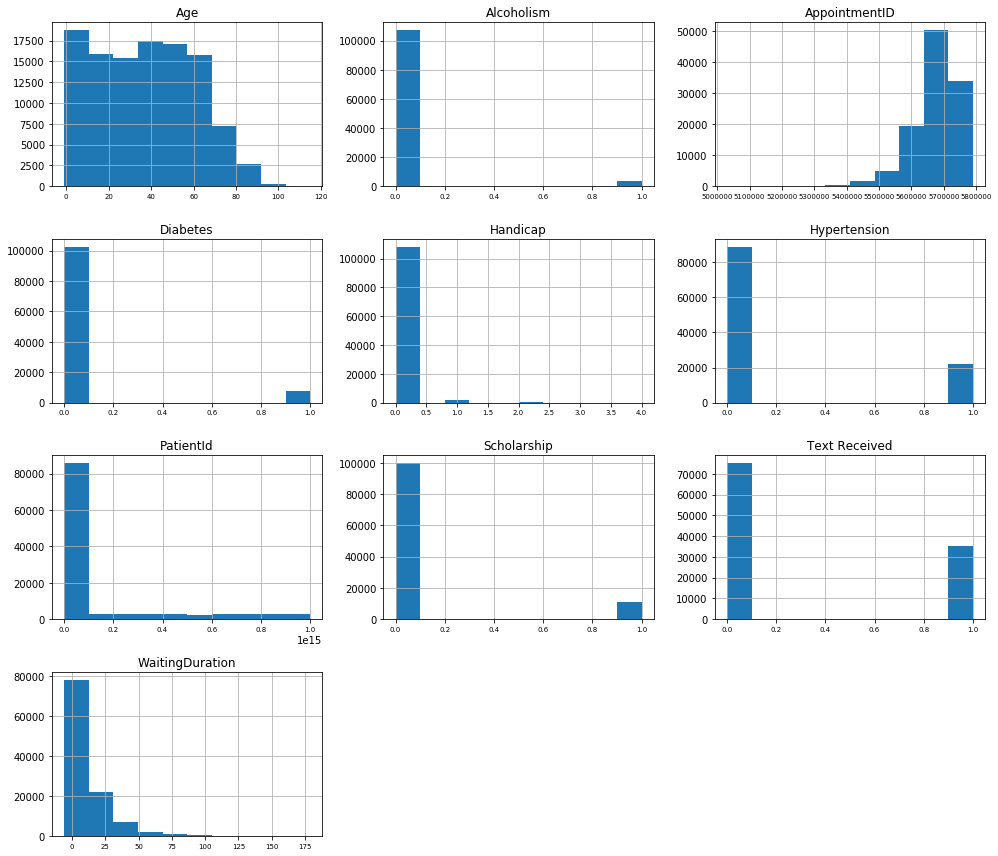

In [10]:
#Create basic histograms
#Initial exploration to see possible trends visually
#Had to add some additional attributes to the code to force a specific size for figures
df.hist(figsize=(14,12), ylabelsize=10, xlabelsize=7);
plt.tight_layout()
#********************************
#NOTE: To display the grid of histograms like this, I cannot display the Y-Axis Label. Please note that the Y-Axis for each\
#histogram is a count for each series. So for example, the 'Age' histogram shows the counts of every age.
#********************************

I know that I could manually enter a histogram for each series and get the Y-Axis label to display. But, I believe the above "matrix" layout of data gives me the quick insights I am looking for so I know where to go next. Rather than spend the additional time to lay out each histogram independently, I am leaving it as-is with the understanding that each is set up to list the counts / totals for each value in the Series (e.g. - How many show a (0) and how many show a (1) for Text Received field).

Nothing really stands out to me in the first pass at the histograms... I do want to check out the ages data a little more.

Text(0.5,1,'Histogram: Count of Ages')

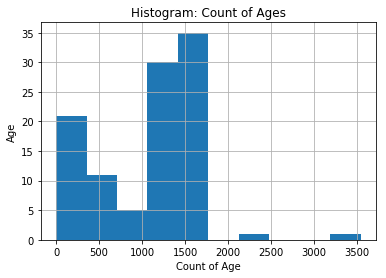

In [11]:
#histogram of counts in the data by ages
groupByAge = df['Age'].value_counts()
groupByAge.hist()
plt.xlabel('Count of Age')
plt.ylabel('Age')
plt.title('Histogram: Count of Ages')

So this tells me most of the patients are likely between ages 35-40ish range.

In [12]:
#running the average element of Pandas to confirm my thinking on the age range
avgAge = df['Age'].mean()
avgAge

37.08887421173107

Now I'm wanting to check and see whether or not there's a decent trend, by age, of no-show percentages. I'll graph this to help visually see.

Text(0.5,0,'Patient Age')

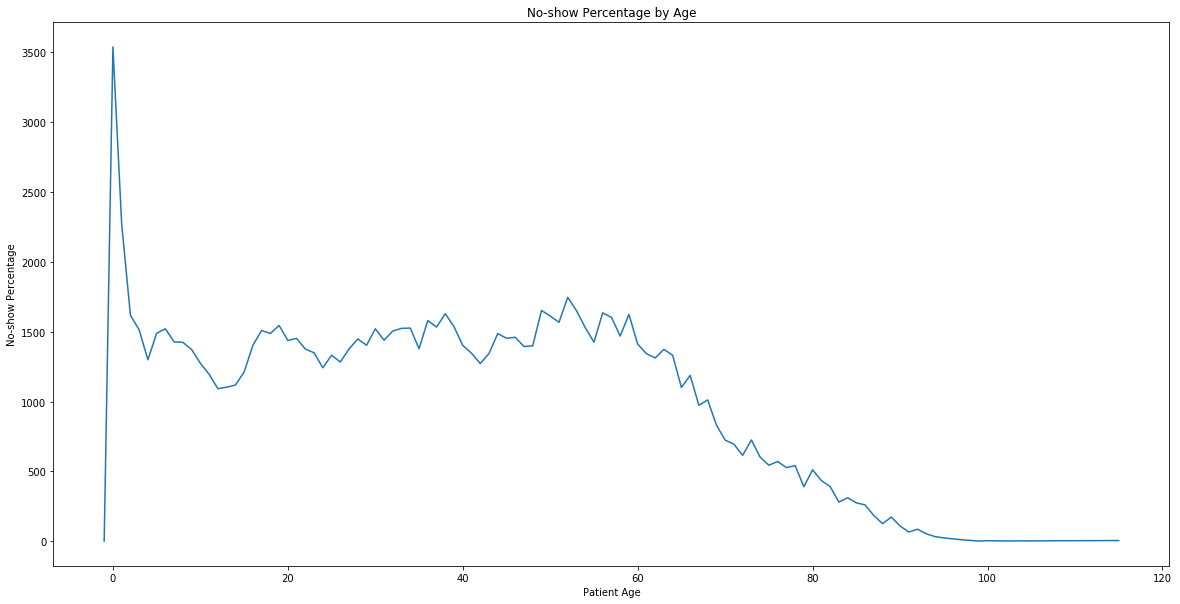

In [14]:
ageInfo = df[['No-show', 'Age']].groupby('Age').count()
ax = ageInfo['No-show'].plot(kind='line', figsize=(20, 10), title='No-show Percentage by Age')
ax.set_ylabel('No-show Percentage')
ax.set_xlabel('Patient Age')

I see now that we have an age range of 0 to 90+ in the raw data... time to clean up / reduce ages that won't majorly impact our analysis.

In [15]:
df = df[(df.Age >= 1) & (df.Age <= 90)]

In [16]:
ageGroups = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df['Age Groups'] = pd.cut(df['Age'], ageGroups)
df.head()

,PatientId,AppointmentID,Gender,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Text Received,No-show,AppointmentDate,DayofWeek,ScheduledDate,WaitingDuration,Age Groups
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,Friday,2016-04-29,0,"(60, 70]"
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29,0,"(50, 60]"
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29,0,"(60, 70]"
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29,0,"(0, 10]"
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,Friday,2016-04-29,0,"(50, 60]"


Text(0.5,0,'Patient age (in 10 year groups)')

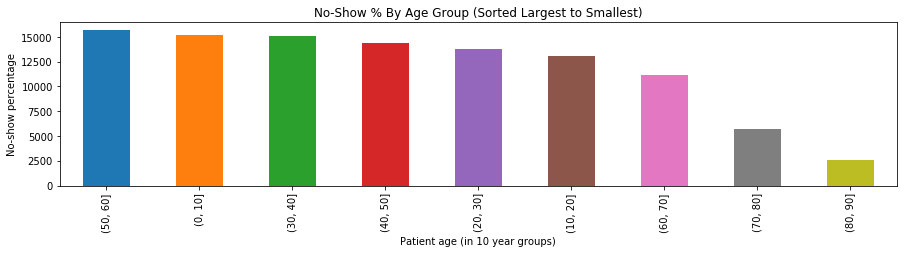

In [17]:
dfAge = df[['No-show', 'Age Groups']].groupby('Age Groups').count()
dfAgeSort = dfAge.reset_index().sort_values('No-show', ascending=False).set_index(['Age Groups'])
plot_title = 'No-Show % By Age Group (Sorted Largest to Smallest)'
ax = dfAgeSort['No-show'].plot(kind='bar', figsize=(15, 3), title=plot_title)
ax.set_ylabel('No-show percentage')
ax.set_xlabel('Patient age (in 10 year groups)')

Based on what I'm seeing here, I'm not confident the data warrants further exploration of no-shows by age group. My curiosity now turns towards seeing what the no-shows look like by Hospital location and/or duration of lead-time.

### Note: When trying to get a chart to build out for locations of hospitals, I realized I need to convert the 'yes' and 'no' from the no-show column to an integar to make it work.

In [18]:
df['No-show'] = df['No-show'].replace(('Yes', 'No'), (1.0, 0.0))
df.head()

,PatientId,AppointmentID,Gender,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Text Received,No-show,AppointmentDate,DayofWeek,ScheduledDate,WaitingDuration,Age Groups
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0.0,2016-04-29,Friday,2016-04-29,0,"(60, 70]"
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0.0,2016-04-29,Friday,2016-04-29,0,"(50, 60]"
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,0.0,2016-04-29,Friday,2016-04-29,0,"(60, 70]"
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0.0,2016-04-29,Friday,2016-04-29,0,"(0, 10]"
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0.0,2016-04-29,Friday,2016-04-29,0,"(50, 60]"


In [19]:
# Setting a threshold of 15 to try and clean out some outliers in the data
threshold = 15
dfNoShow = df[['No-show', 'Neighborhood']].groupby('Neighborhood').filter(lambda x: len(x) > threshold)
df['No-show'] = (df['No-show']).astype('int64')
dfNoShow = dfNoShow.groupby('Neighborhood').mean()


<a id='eda2'></a>
## Data Analysis

### Research Question 2 
##### Are more no-shows happening in a particular hospital location?

Text(0,0.5,'No-show %')

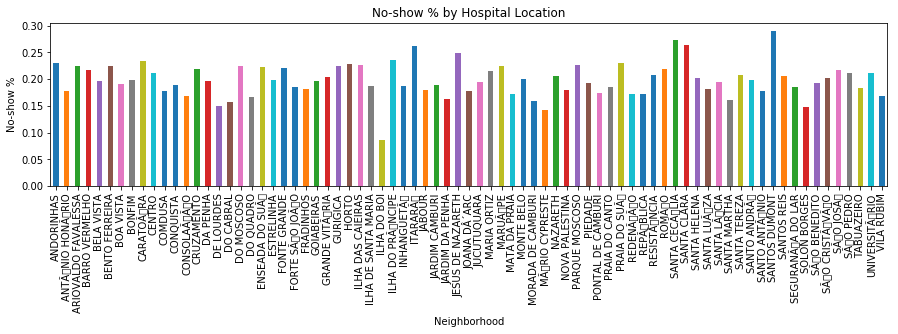

In [20]:
# plotting bar chart showing percentage of no-shows by hospital locations
ax = dfNoShow['No-show'].plot(kind='bar', figsize=(15, 3), title='No-show % by Hospital Location')
ax.set_ylabel('No-show %')

I'm not seeing a pattern here... going to try and sort these and see if I can see one then.

Text(0,0.5,'No-show %')

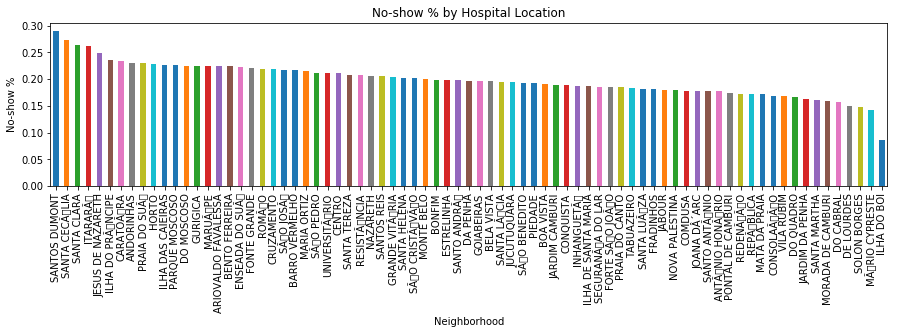

In [21]:
dfSort = dfNoShow.reset_index().sort_values('No-show', ascending=False).set_index(['Neighborhood'])
ax = dfSort['No-show'].plot(kind='bar', figsize=(15, 3), title='No-show % by Hospital Location')
ax.set_ylabel('No-show %')

Now that I have it sorted, I do see a general trend in no-shows by hospital location.

<a id='eda3'></a>
## Data Analysis

### Research Question 3 
##### Are more no-shows based on lead-time?

Text(0.5,0,'Days between scheduling and appointment')

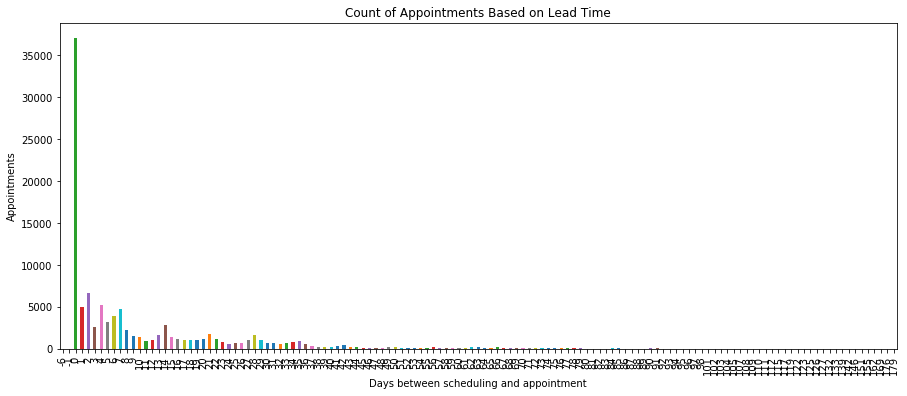

In [22]:
dfDaysBetween = df[['No-show', 'WaitingDuration']].groupby('WaitingDuration').count()
ax = dfDaysBetween['No-show'].plot(kind='bar', figsize=(15, 6), title='Count of Appointments Based on Lead Time')
ax.set_ylabel('Appointments')
ax.set_xlabel('Days between scheduling and appointment')

I see there are negative numbers in the chart... and that's impossible / can't be realistic. I'm going to try and drop everything outside the range of less than 0 and greater than 43 days as everything else appears to be outliers and is insignificant.

Text(0.5,0,'Days between scheduling and appointment')

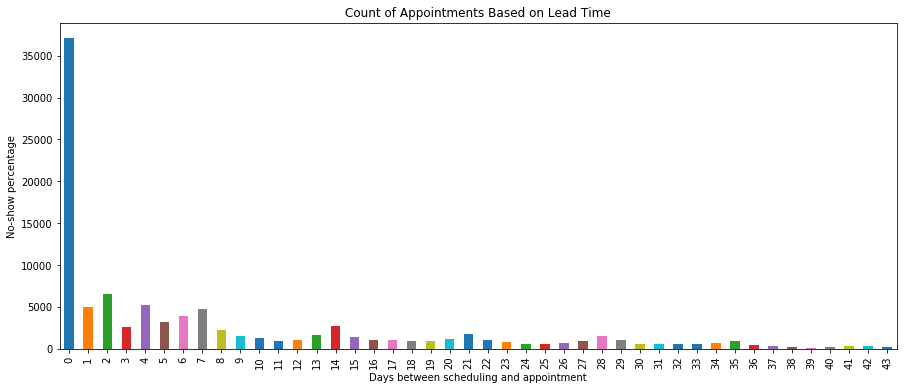

In [23]:
#removing negative waiting duration data and any duration beyond 14 days
dfDaysBetween = df.drop(df.index[df.WaitingDuration < 0])
dfDaysBetween = dfDaysBetween.drop(dfDaysBetween.index[dfDaysBetween.WaitingDuration > 43])
dfDaysBetween = dfDaysBetween[['No-show', 'WaitingDuration']].groupby('WaitingDuration').count()
ax = dfDaysBetween['No-show'].plot(kind='bar', figsize=(15, 6), title='Count of Appointments Based on Lead Time')
ax.set_ylabel('No-show percentage')
ax.set_xlabel('Days between scheduling and appointment')

Text(0.5,0,'Days between scheduling and appointment')

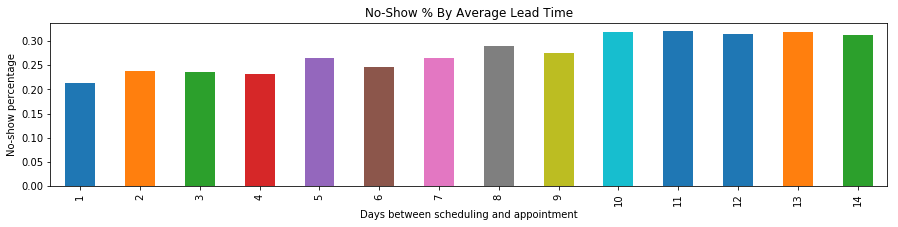

In [24]:
#removing negative waiting duration data and any duration beyond 14 days
dfDaysBetween = df.drop(df.index[df.WaitingDuration < 1])
dfDaysBetween = dfDaysBetween.drop(dfDaysBetween.index[dfDaysBetween.WaitingDuration > 14])
dfDaysBetween = dfDaysBetween[['No-show', 'WaitingDuration']].groupby('WaitingDuration').mean()
ax = dfDaysBetween['No-show'].plot(kind='bar', figsize=(15, 3), title='No-Show % By Average Lead Time')
ax.set_ylabel('No-show percentage')
ax.set_xlabel('Days between scheduling and appointment')

Looking at this data now, I see that the longer lead-time for an appointment the higher the probability the patient will "no-show."

Now that the data looks cleaner to me, I am going to remove all rows where the age is less than (0) as it's erroneous data. Additionally, this allows us to still count the un-born children as the age of (0).

In [25]:
#removing negative waiting duration data and any duration beyond 14 days
df.drop(df[df.Age < 0].index, inplace=True)

Now let's plot this out again and see how the data looks with the age data cleaned up. Instead of total counts, I'm going to look at average's by age.

Text(0.5,0,'Patient Age')

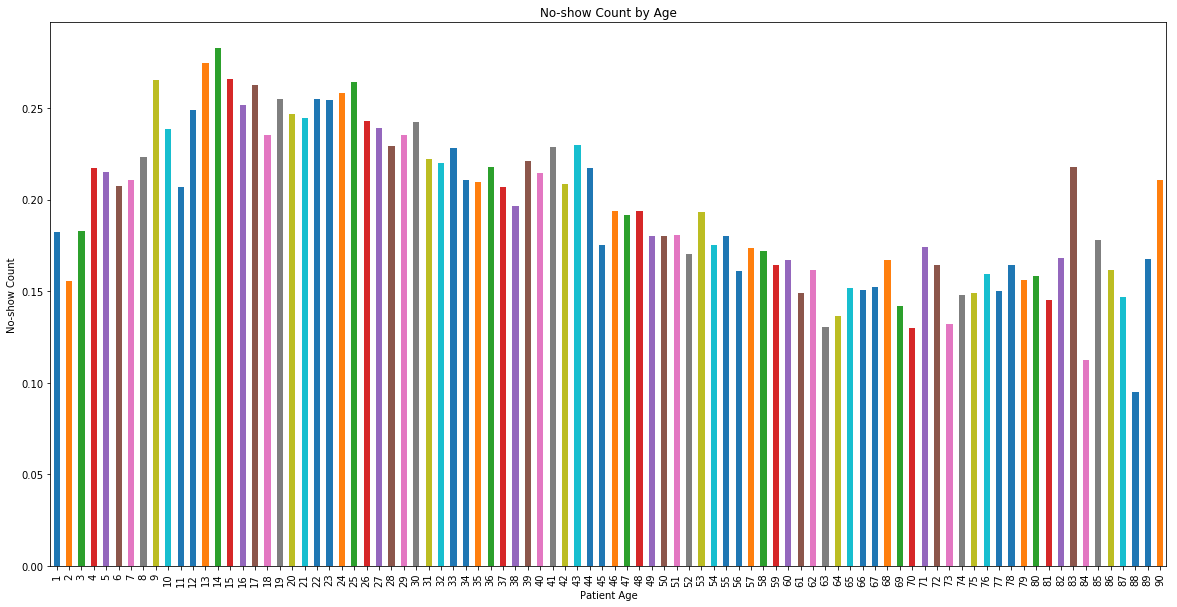

In [26]:
ageInfo = df[['No-show', 'Age']].groupby('Age').mean()
ax = ageInfo['No-show'].plot(kind='bar', figsize=(20, 10), title='No-show Count by Age')
ax.set_ylabel('No-show Count')
ax.set_xlabel('Patient Age')

Looking at this data now, I do see that teenagers through middle-aged people account for the majority of folks that no-show.

<a id='conclusions'></a>
## Conclusions

- The data shows that the greater the lead-time is for setting an appointment, the more likely the patient will not show.
- The data shows that the majority of appointments are less than 7 days in advance.
- The data shows that there's a correlation in the % of no-shows to hospital location. However, the data needs further analysis to make the necessary additional determinations (e.g. - geographical mapping of the locations)
- The data didn't show any significant insights regarding % of no-shows to any age groups, although a general correlation does appear from mid-teens to middle-age ranges.

<a id='limitations'></a>
## Limitations

- The data had data that reflected ages below zero. This caused the data to be skewed.
- There was no definition or context given for having fields such as "Diabetes" in the data. This made it difficult to understand the intent behind it.